In [1]:
import os
import numpy as np
from sklearn.mixture import GMM
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# Read the ELG metadata as an example.  Focus on D4000 vs EW([OII]).
ff = fits.getdata(os.path.join(os.getenv('DESI_BASIS_TEMPLATES'),'elg_templates_v1.5.fits'),1)
X = np.array((ff['D4000'],np.log10(ff['OII_3727_EW']))).T

In [3]:
# Model the distribution using a mixture of Gaussians (try n=3).  Draw 1000 points.
model = GMM(n_components=3, covariance_type="full").fit(X)
samp = model.sample(1000)

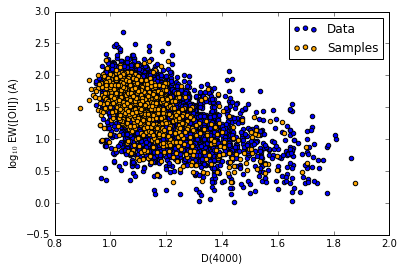

In [4]:
# Make a plot.  Looks pretty good!
plt.scatter(X[:,0],X[:,1],label='Data')
plt.scatter(samp[:,0],samp[:,1],c='orange',label='Samples')
plt.xlabel('D(4000)')
plt.ylabel('log$_{10}$ EW([OII]) (A)')
plt.xlim((0.8,2.0))
plt.legend()
plt.show()

In [5]:
# But how many components should we use? Get the Bayesian information criterion and find the minimum.
ncomp = np.arange(2,11)
bic = np.ndarray(len(ncomp))
for ii, nc in enumerate(ncomp):
    bic[ii] = GMM(n_components=nc, covariance_type="full").fit(X).bic(X)
    print(nc, bic[ii])

(2, -13848.843205285399)
(3, -14088.890586376938)
(4, -14080.913057430216)
(5, -14028.743655239758)
(6, -13994.503775299328)
(7, -13895.707717876583)
(8, -13892.142797185121)
(9, -13804.8590770268)
(10, -13781.893219233516)


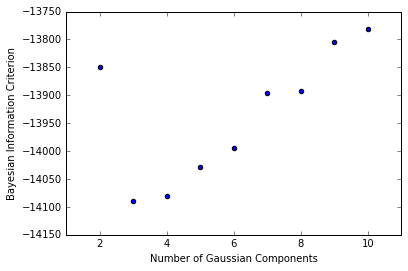

In [6]:
# Make a plot.  Looks like 3 is about right!
plt.scatter(ncomp,bic)
plt.xlabel('Number of Gaussian Components')
plt.ylabel('Bayesian Information Criterion')
plt.show()

In [7]:
# But now the question: what's the best way to store the model?!?  Pickle file?  ASCII?